In [1]:
import pip

!pip install matplot

# install pandas
%matplotlib inline
! pip install --user pandas
! pip install --user numpy
! pip install --user matplotlib

In [2]:
base_api_url="http://localhost:8080/"
test_text="""\
Deutsche Bank today announced the launch of GEM Connect, a component-based solution designed to address workflow challenges across collections, payments, funding and FX in APAC markets with capital restrictions.

Developed by the bankís Corporate Bank and Fixed Income & Currencies business units in APAC, GEM Connect links treasury processes together into automated workflows, simplifying complex processes for clients moving money to, from and across markets with capital restrictions.

Using any combination of GEM Connectís components, such as its rules-based FX execution tool and payment and hedge matching solution, Deutsche Bank is able to provide a one-stop liquidity and FX management solution for its clients in emerging markets such as India, Indonesia, Korea, Mainland China, Malaysia, Philippines, Taiwan and Thailand.

Use cases can include:
- Target balance automation to support up and downstream cross-border intra-company payments, with or without an account to streamline liquidity or commercial payment objectives.
- Automated reconciliation of payments and collections against FX hedge contracts to speed up cross-border settlements, reduce hedging costs and achieve operational efficiency.
- Automated execution of onshore payments or receipts with a hedge adjustment to reduce basis risk and periods of open market risk for FX execution outside Asia time zones.

GEM Connect will also be rolled out in other emerging markets outside of the region.

APAC Head of Corporate Bank and Fixed Income & Currencies, David Lynne, said: ìBy removing manual processes and currency risk in intra-company cross-border transactions involving emerging markets, Deutsche Bank addresses real problems faced by our corporate clients. GEM Connect is a turning point. It will play a key role in helping treasurers to better manage their liquidity both at group and subsidiary levels. We will continue to invest in integrated platform technology in order to provide seamless client solutions.
"""


In [3]:
import requests
import json

url=base_api_url + "api/analyse/sentiment"

payload= {'text': test_text}
method="POST"

response = requests.request(method, url, json=payload)
print(response.text)



[
  {
    "index": 1, 
    "label": "neutral", 
    "magnitude": 0.0, 
    "score": 0.0, 
    "text": "Deutsche Bank today announced the launch of GEM Connect, a component-based solution designed to address workflow challenges across collections, payments, funding and FX in APAC markets with capital restrictions."
  }, 
  {
    "index": 2, 
    "label": "neutral", 
    "magnitude": 0.0, 
    "score": 0.0, 
    "text": "Developed by the bank\u00eds Corporate Bank and Fixed Income & Currencies business units in APAC, GEM Connect links treasury processes together into automated workflows, simplifying complex processes for clients moving money to, from and across markets with capital restrictions."
  }, 
  {
    "index": 3, 
    "label": "positive", 
    "magnitude": 0.6000000238418579, 
    "score": 0.6000000238418579, 
    "text": "Using any combination of GEM Connect\u00eds components, such as its rules-based FX execution tool and payment and hedge matching solution, Deutsche Bank is ab

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = json.loads(response.text)
sentiment_df = pd.json_normalize(data)

#### Visualise data

In [5]:
sentiment_data = sentiment_df.describe()
print(sentiment_data)

           index  magnitude      score
count  11.000000  11.000000  11.000000
mean    6.000000   0.254545   0.254545
std     3.316625   0.280584   0.280584
min     1.000000   0.000000   0.000000
25%     3.500000   0.000000   0.000000
50%     6.000000   0.100000   0.100000
75%     8.500000   0.600000   0.600000
max    11.000000   0.600000   0.600000


#### Box Plots

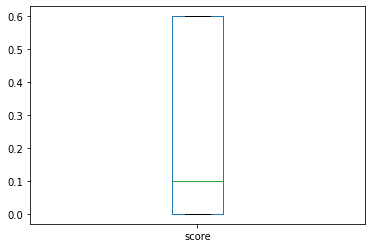

In [6]:
# box plot for the monthly rainfall
sentiment_df.plot.box(y='score')
plt.show()

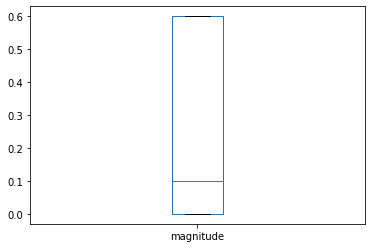

In [7]:
# box plot for the monthly rainfall
sentiment_df.plot.box(y='magnitude')
plt.show()

#### Histogram of Sentiment score over Sentence number

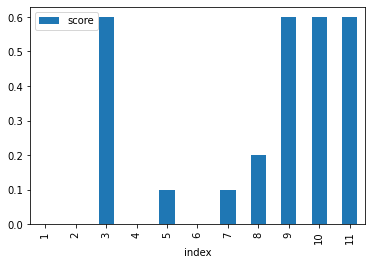

In [8]:
sentiment_df.plot.bar(y='score',x='index')
plt.show()

#### Histogram of Sentiment score and magnitude over Sentence number

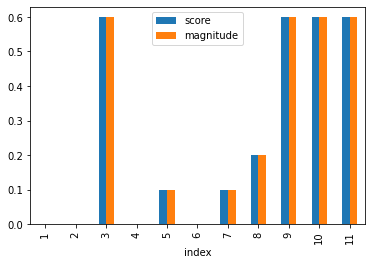

In [9]:
sentiment_df.plot(kind='bar', y=['score', 'magnitude'], x='index')
plt.show()

#### Retrieve Entities Analysis

In [10]:
url = base_api_url + "api/analyse/entities"

payload= {'text': test_text}
method="POST"

response_entities = requests.request(method, url, json=payload)

#### Visualise JSON

In [11]:
print(response_entities.text)

[
  {
    "Salience": 0.1722453236579895, 
    "name": "GEM Connect", 
    "type": "OTHER"
  }, 
  {
    "Salience": 0.12458782643079758, 
    "mid": "/m/02lc8s", 
    "name": "Deutsche Bank", 
    "type": "ORGANIZATION", 
    "wikipedia_url": "https://en.wikipedia.org/wiki/Deutsche_Bank"
  }, 
  {
    "Salience": 0.07987216114997864, 
    "name": "launch", 
    "type": "EVENT"
  }, 
  {
    "Salience": 0.06634209305047989, 
    "mid": "/m/02_cz4", 
    "name": "FX", 
    "type": "ORGANIZATION", 
    "wikipedia_url": "https://en.wikipedia.org/wiki/Foreign_exchange_market"
  }, 
  {
    "Salience": 0.04941710829734802, 
    "name": "Currencies", 
    "type": "OTHER"
  }, 
  {
    "Salience": 0.0427037850022316, 
    "name": "payments", 
    "type": "OTHER"
  }, 
  {
    "Salience": 0.0427037850022316, 
    "name": "markets", 
    "type": "OTHER"
  }, 
  {
    "Salience": 0.032725028693675995, 
    "name": "collections", 
    "type": "WORK_OF_ART"
  }, 
  {
    "Salience": 0.032725028693

#### Visualise DataForm

In [12]:
data_entities = json.loads(response_entities.text)
entities_df = pd.json_normalize(data_entities)

print(entities_df)
print(entities_df.describe())


    Salience                  name          type        mid  \
0   0.172245           GEM Connect         OTHER        NaN   
1   0.124588         Deutsche Bank  ORGANIZATION  /m/02lc8s   
2   0.079872                launch         EVENT        NaN   
3   0.066342                    FX  ORGANIZATION  /m/02_cz4   
4   0.049417            Currencies         OTHER        NaN   
5   0.042704              payments         OTHER        NaN   
6   0.042704               markets         OTHER        NaN   
7   0.032725           collections   WORK_OF_ART        NaN   
8   0.032725  capital restrictions         OTHER        NaN   
9   0.028799               funding         OTHER        NaN   
10  0.028799   workflow challenges         OTHER        NaN   
11  0.027829                  APAC         OTHER  /m/055yrc   
12  0.012285        Corporate Bank  ORGANIZATION  /m/01bs4t   
13  0.012285                bankís  ORGANIZATION   /m/017ql   
14  0.007877               markets         OTHER       

#### Visualise Scatter

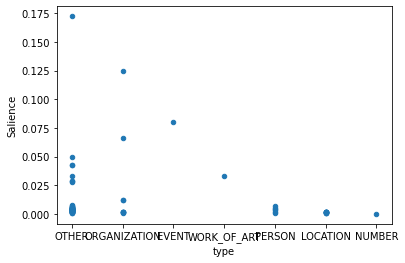

In [14]:
entities_df.plot(kind='scatter', y='Salience', x='type')
plt.show()


#### Visualise Bar

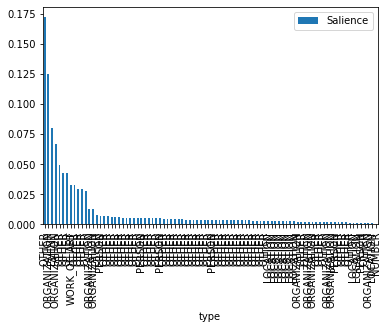

In [15]:
entities_df.plot(kind='bar', y='Salience', x='type')
plt.show()


#### Visualise Box Percentiles:

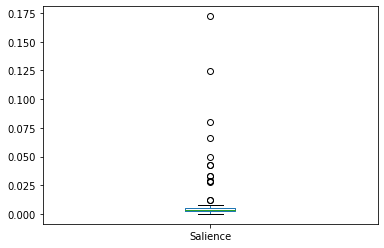

In [16]:
entities_df.plot.box(y='Salience')
plt.show()